# **Let's Try DDNM!**

Zero Shot Image Restoration Using Denoising Diffusion Null-Space Model

[Yinhuai Wang](https://wyhuai.github.io/info/)\*, Jiwen Yu\*, Jian Zhang

[Paper](https://arxiv.org/pdf/2212.00490.pdf) | [Project](https://wyhuai.github.io/ddnm.io/) | [Github](https://github.com/wyhuai/DDNM)

If you find this work useful, please consider citing:


```
@article{wang2022ddnm,
title={Zero Shot Image Restoration Using Denoising Diffusion Null-Space Model},
author={Yinhuai, Wang and Jiwen, Yu and Jian, Zhang},
journal={arXiv:2212.00490},
year={2022}}
}
```



In [4]:
weatherDiffPath = '/workspace/DDNM/exp/logs/raindrop/WeatherDiff128.pth.tar'
uncondDiffPath = '/workspace/DDNM/exp/logs/imagenet/256x256_diffusion_uncond.pt'

In [3]:
cd /workspace/DDNM/guided_diffusion

/workspace/DDNM/guided_diffusion


In [7]:
from guided_diffusion.models import Model
model = Model()
model.load_state_dict(torch.load(weatherDiffPath, map_location=self.device))

TypeError: __init__() missing 1 required positional argument: 'config'

In [15]:
!wget https://igi-web.tugraz.at/download/OzdenizciLegensteinTPAMI2023/WeatherDiff128.pth.tar

--2023-03-08 08:33:51--  https://igi-web.tugraz.at/download/OzdenizciLegensteinTPAMI2023/WeatherDiff128.pth.tar
Resolving igi-web.tugraz.at (igi-web.tugraz.at)... 129.27.124.233
Connecting to igi-web.tugraz.at (igi-web.tugraz.at)|129.27.124.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1370274225 (1.3G) [application/x-tar]
Saving to: ‘WeatherDiff128.pth.tar’

WeatherDiff128.pth. 100%[===================>]   1.28G  12.3MB/s    in 2m 13s  

2023-03-08 08:36:05 (9.84 MB/s) - ‘WeatherDiff128.pth.tar’ saved [1370274225/1370274225]



In [20]:
!pip install untar

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ERROR: Could not find a version that satisfies the requirement untar (from versions: none)
ERROR: No matching distribution found for untar


In [21]:
!unzip WeatherDiff128.pth.tar

unzip:  cannot find or open WeatherDiff128.pth.tar, WeatherDiff128.pth.tar.zip or WeatherDiff128.pth.tar.ZIP.


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'

In [4]:
!nvidia-smi

Wed Mar 22 06:10:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.156.00   Driver Version: 450.156.00   CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      On   | 00000000:07:00.0 Off |                    0 |
| N/A   28C    P0    61W / 400W |  38252MiB / 40537MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  A100-SXM4-40GB      On   | 00000000:0F:00.0 Off |                    0 |
| N/A   

# **Preparation**

This colab demo is based on [RePaint](https://github.com/andreas128/RePaint).

Check the GPU

In [2]:
!/opt/bin/nvidia-smi


/bin/bash: /opt/bin/nvidia-smi: No such file or directory


In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar 22 06:10:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.156.00   Driver Version: 450.156.00   CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      On   | 00000000:07:00.0 Off |                    0 |
| N/A   28C    P0    61W / 400W |  38252MiB / 40537MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  A100-SXM4-40GB      On   | 00000000:0F:00.0 Off |                    0 |
| N/A   

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 1082.0 gigabytes of available RAM

You are using a high-RAM runtime!


Clone the code

In [40]:
%pwd

'/workspace/DDNM'

In [ ]:
# !git clone https://github.com/wyhuai/DDNM.git

Cloning into 'DDNM'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (394/394), done.
remote: Compressing objects: 100% (276/276), done.
remote: Total 562 (delta 219), reused 229 (delta 106), pack-reused 168
Receiving objects: 100% (562/562), 14.17 MiB | 19.29 MiB/s, done.
Resolving deltas: 100% (237/237), done.


Download the pretrained models

In [ ]:
# mkdir /content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo/data/pretrained

In [7]:
cd hq_demo/data/pretrained

/workspace/DDNM/hq_demo/data/pretrained


In [8]:
!wget https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_classifier.pt # Trained by OpenAI

--2023-03-07 08:04:55--  https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_classifier.pt
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.150.77.132
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.150.77.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216496432 (206M) [application/octet-stream]
Saving to: ‘256x256_classifier.pt.1’

256x256_classifier. 100%[===================>] 206.47M  1.29MB/s    in 2m 36s  

2023-03-07 08:07:31 (1.33 MB/s) - ‘256x256_classifier.pt.1’ saved [216496432/216496432]



In [2]:
!wget https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_diffusion.pt # Trained by OpenAI

--2023-03-07 09:05:22--  https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_diffusion.pt
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.150.77.132
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.150.77.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215479544 (2.1G) [application/octet-stream]
Saving to: ‘256x256_diffusion.pt’

256x256_diffusion.p  57%[==========>         ]   1.19G   994KB/s    eta 13m 3s ^C


Environment setup

In [4]:
pip install numpy torch blobfile tqdm pyYaml pillow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 73 kB 4.2 MB/s eta 0:00:011
     |████████████████████████████████| 2.1 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 34.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# **DDNM for arbitrary size** (sr_averagepooling)


## Orange Demo
This is an image super-resolution demo that bring a 64x256 orange image into a high-quality 256x1024 result.

Run the following command, which may take 10 minutes:

In [ ]:
cd /content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo

/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo


In [ ]:
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/orange.png --class 950 --deg "sr_averagepooling" --scale 4 -i orange

Start inet256
loading classifier...
sampling...
total shifts:   0% 0/7 [00:00<?, ?it/s]
  0% 0/460 [00:00<?, ?it/s]
  0% 1/460 [00:07<58:08,  7.60s/it]
  0% 2/460 [00:07<25:18,  3.32s/it]
  1% 3/460 [00:08<14:49,  1.95s/it]
  1% 4/460 [00:08<09:53,  1.30s/it]
  1% 5/460 [00:08<07:10,  1.06it/s]
  1% 6/460 [00:09<05:32,  1.37it/s]
  2% 7/460 [00:09<04:29,  1.68it/s]
  2% 8/460 [00:09<03:48,  1.98it/s]
  2% 9/460 [00:10<03:21,  2.23it/s]
  2% 10/460 [00:10<03:02,  2.46it/s]
  2% 11/460 [00:10<02:50,  2.63it/s]
  3% 12/460 [00:11<02:40,  2.80it/s]
  3% 13/460 [00:11<02:33,  2.90it/s]
  3% 14/460 [00:11<02:29,  2.98it/s]
  3% 15/460 [00:12<02:26,  3.03it/s]
  3% 16/460 [00:12<02:24,  3.07it/s]
  4% 17/460 [00:12<02:22,  3.10it/s]
  4% 18/460 [00:12<02:21,  3.12it/s]
  4% 19/460 [00:13<02:20,  3.14it/s]
  7% 30/460 [00:13<00:34, 12.58it/s]
  7% 32/460 [00:14<00:52,  8.22it/s]
  7% 33/460 [00:14<01:01,  6.98it/s]
  7% 34/460 [00:14<01:11,  5.97it/s]
  8% 35/460 [00:15<01:22,  5.17it/s]
  8% 

Show the input image

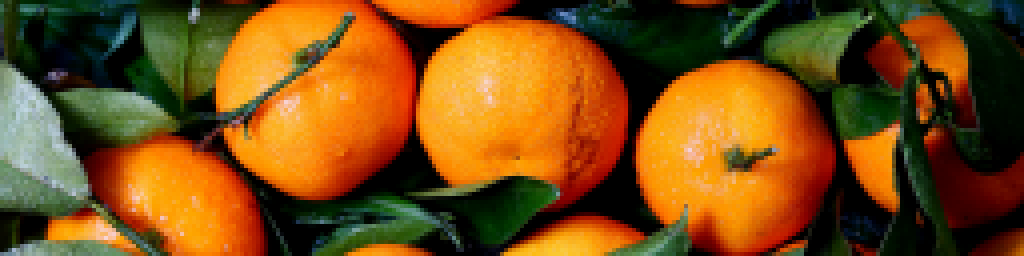

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo/results/orange/Apy/00000.png')
img_Apy


Show the result restored by DDNM

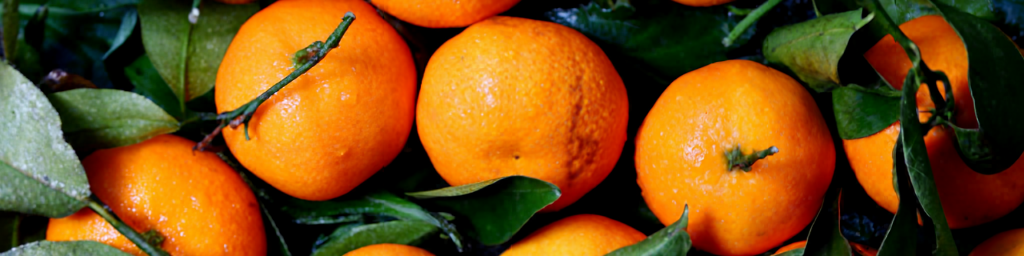

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo/results/orange/final/00000.png')
img

## Butterfly Demo
This is an image super-resolution demo that bring a **noisy** 99x141 butterfly image into a high-quality 396x564 result.

Run the following command, which may take 16 minutes:

In [ ]:
cd /content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo

/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo


In [ ]:
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/monarch.png --class 323 --deg "sr_averagepooling" --scale 4 --sigma_y 0.5 -i monarch

Start inet256
loading classifier...
sampling...
total shifts:   0% 0/12 [00:00<?, ?it/s]
  0% 0/460 [00:00<?, ?it/s]
  0% 1/460 [00:07<1:00:19,  7.89s/it]
  0% 2/460 [00:08<25:23,  3.33s/it]  
  1% 3/460 [00:08<14:13,  1.87s/it]
  1% 4/460 [00:08<08:58,  1.18s/it]
  1% 5/460 [00:08<06:04,  1.25it/s]
  1% 6/460 [00:08<04:19,  1.75it/s]
  2% 7/460 [00:08<03:13,  2.34it/s]
  2% 8/460 [00:08<02:30,  3.01it/s]
  2% 9/460 [00:08<02:01,  3.73it/s]
  2% 10/460 [00:09<01:41,  4.45it/s]
  2% 11/460 [00:09<01:27,  5.14it/s]
  3% 12/460 [00:09<01:18,  5.74it/s]
  3% 13/460 [00:09<01:11,  6.22it/s]
  3% 14/460 [00:09<01:07,  6.63it/s]
  3% 15/460 [00:09<01:04,  6.94it/s]
  3% 16/460 [00:09<01:02,  7.13it/s]
  4% 17/460 [00:09<01:00,  7.33it/s]
  4% 18/460 [00:10<00:59,  7.46it/s]
  4% 19/460 [00:10<00:58,  7.55it/s]
  7% 30/460 [00:10<00:14, 30.33it/s]
  7% 34/460 [00:10<00:25, 16.41it/s]
  8% 37/460 [00:11<00:32, 13.00it/s]
  8% 39/460 [00:11<00:36, 11.60it/s]
 11% 50/460 [00:11<00:17, 23.97it/s]


Show the input image

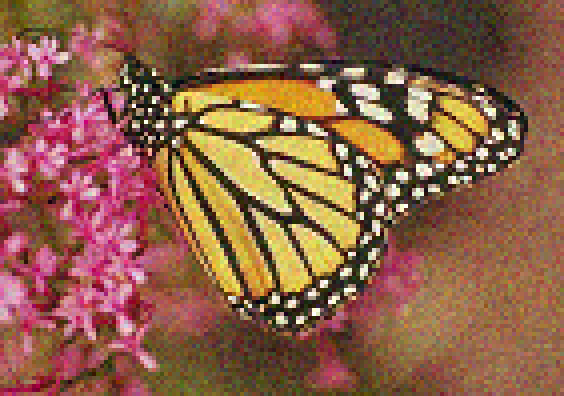

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo/results/monarch/Apy/00000.png')
img_Apy


Show the result restored by DDNM

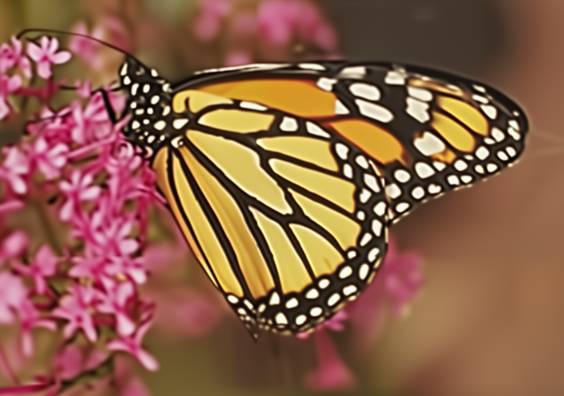

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo/results/monarch/final/00000.png')
img

## Bear Demo
This is an image super-resolution demo that bring a 96x256 bear image into a high-quality 384x1024 result.

Run the following command, which may take 20 minutes:

In [ ]:
cd /content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo

/content/DDNM/hq_demo


In [ ]:
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/bear.png --class 294 --deg "sr_averagepooling" --scale 4 -i bear

Start inet256
loading classifier...
sampling...
total shifts:   0% 0/14 [00:00<?, ?it/s]
  0% 0/460 [00:00<?, ?it/s]
  0% 1/460 [00:02<22:52,  2.99s/it]
  0% 2/460 [00:03<10:00,  1.31s/it]
  1% 3/460 [00:03<05:53,  1.29it/s]
  1% 4/460 [00:03<03:58,  1.91it/s]
  1% 5/460 [00:03<02:53,  2.62it/s]
  1% 6/460 [00:03<02:14,  3.38it/s]
  2% 7/460 [00:03<01:49,  4.14it/s]
  2% 8/460 [00:03<01:33,  4.83it/s]
  2% 9/460 [00:04<01:22,  5.46it/s]
  2% 10/460 [00:04<01:15,  5.99it/s]
  2% 11/460 [00:04<01:10,  6.41it/s]
  3% 12/460 [00:04<01:07,  6.68it/s]
  3% 13/460 [00:04<01:04,  6.96it/s]
  3% 14/460 [00:04<01:02,  7.17it/s]
  3% 15/460 [00:04<01:00,  7.30it/s]
  3% 16/460 [00:04<00:59,  7.41it/s]
  4% 17/460 [00:05<00:58,  7.52it/s]
  4% 18/460 [00:05<00:58,  7.60it/s]
  4% 19/460 [00:05<00:57,  7.65it/s]
  7% 30/460 [00:05<00:14, 29.69it/s]
  7% 33/460 [00:05<00:24, 17.64it/s]
  8% 36/460 [00:06<00:31, 13.28it/s]
  8% 38/460 [00:06<00:36, 11.62it/s]
  9% 40/460 [00:06<00:34, 12.29it/s]
 11%

Show the input image

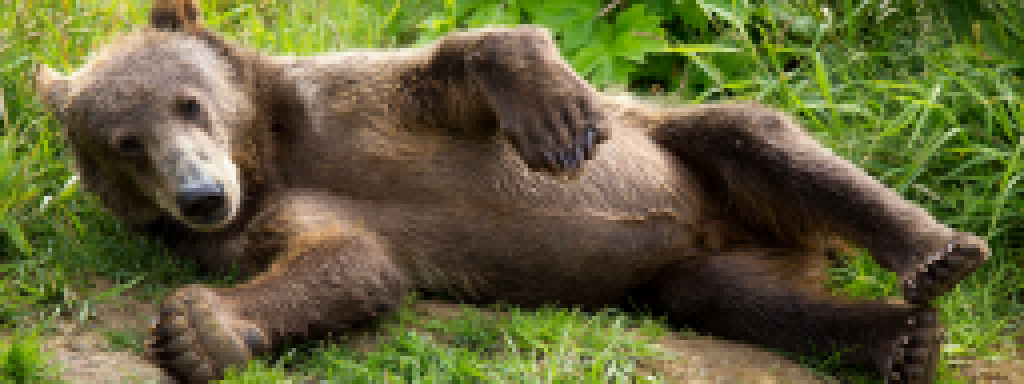

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo/results/bear/Apy/00000.png')
img_Apy


Show the result restored by DDNM

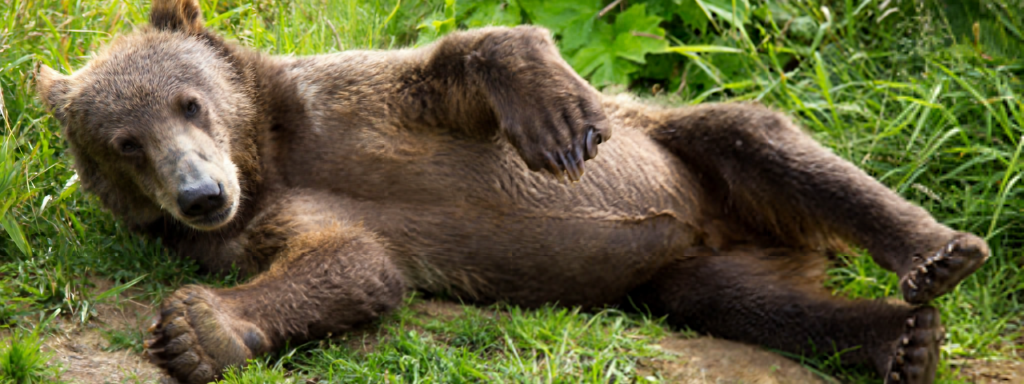

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/hq_demo/results/bear/final/00000.png')
img

## Try other images
You may copy these commands:

```
    # orange
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/orange.png --class 950 --deg "sr_averagepooling" --scale 4 -i orange

    # brown bear
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/bear.png --class 294 --deg "sr_averagepooling" --scale 4 -i bear

    # flamingo
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/flamingo.png --class 130 --deg "sr_averagepooling" --scale 2 -i flamingo

    # kimono
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/kimono.png --class 614 --deg "sr_averagepooling" --scale 2 -i kimono

    # zebra 
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/zebra.png --class 340 --deg "sr_averagepooling" --scale 4 -i zebra
```
To speed up inference, open "/content/DDNM/hq_demo/confs/inet256.yml" and change the following values:

```
timestep_respacing: '50'
schedule_jump_params:
  t_T: 50
  jump_length: 1
  jump_n_sample: 1
```
This may speed up inference but compromise the quality. In contrast, you can sacrifice the inference time to get better quality. For example：

```
timestep_respacing: '250'
schedule_jump_params:
  t_T: 250
  jump_length: 10
  jump_n_sample: 5
```


To try different SR scales, just change "--scale".

To try your own image, just change "--path_y". 

**Important Note**:


*   You may use input image of arbitrary size
*   **You need to set the correct [class lable](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) of the input image.**
*   If your input image is already resized to the desired output size, **do not** use "--resize_y".





---




# **DDNM for face images**

## Demo

This is a demo of solving a complex degradation using DDNM, where the degradation is composed by downsampling, grayscale, and mask.

Download the pretrained model. If this command doesn't work, you can download from [this link](https://drive.google.com/uc?id=1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX) and upload the model to the "/content/DDNM/hq_demo/data/pretrained" folder.

In [ ]:
cd /content/DDNM/hq_demo/data/pretrained

In [ ]:
!gdown https://drive.google.com/uc?id=1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX # Trained by RePaint

Run the following code:

In [ ]:
cd /content/DDNM/hq_demo

In [ ]:
!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/orig_1.png --deg "mask_color_sr" --scale 8 -i face

Show the input image

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/face/Apy/00000.png')
img_Apy


Show the result restored by DDNM

In [ ]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/face/final/00000.png')
img

## Try different tasks
You may copy these commands:

```
!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/girl.png --deg "sr_averagepooling" --scale 16 -i face

!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/girl.png --deg "inpainting" -i face

!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/girl.png --deg "colorization" -i face
```

To try your own face image, just change "/content/DDNM/hq_demo/data/datasets/gts/face/girl.png". Make sure it is already resized to 256x256. 

To speed up inference, open "/content/DDNM/hq_demo/confs/face256.yml" and change the following values:

```
timestep_respacing: '50'
schedule_jump_params:
  t_T: 50
  jump_length: 1
  jump_n_sample: 1
```
This may speed up inference but compromise the quality. In contrast, you can sacrifice the inference time to get better quality. For example：

```
timestep_respacing: '250'
schedule_jump_params:
  t_T: 250
  jump_length: 20
  jump_n_sample: 5
```

---




# **DDNM for Raindrop Removal**
This is under research

In [1]:
%pwd

'/workspace/DDNM'

In [2]:
cd /workspace/DDNM/

/workspace/DDNM


## Force other degradation method
Because there is no SVD operator, degradation matrix, etc for raindrop removal, we use some similar degradation, such as denoising, deblruing, and inpainting

### cond_simplified_imagenet_raindrop_denoising

In [21]:
%%time
!python main.py --ni --simplified --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "denoising" --sigma_y 0.1 -i cond_simplified_imagenet_raindrop_denoising

INFO - main.py - 2023-04-03 09:30:02,676 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: denoising
Start from 0
  0%|                                                     | 0/6 [00:02<?, ?it/s]
ERROR - main.py - 2023-04-03 09:30:17,390 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 450, in simplified_ddnm_plus
    et = model(xt, t)
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/data_parallel.py", line 168, in forward
    

### simplified_imagenet_raindrop_denoising

In [18]:
%%time
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --sigma_y 0.1 -i simplified_imagenet_raindrop_denoising

INFO - main.py - 2023-04-03 09:20:04,555 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: denoising
Start from 0
 86%|████████████████████████████████████      | 86/100 [00:12<00:01,  7.18it/s]


 72%|██████████████████████████████▏           | 72/100 [00:10<00:03,  7.23it/s]


 56%|███████████████████████▌                  | 56/100 [00:07<00:06,  7.00it/s]


PSNR: 35.63: 100%|████████████████████████████████| 6/6 [01:36<00:00, 16.00s/it]
[tensor(39.3785, device='cuda:0'), tensor(38.4390, device='cuda:0'), tensor(36.9667, device='cuda:0'), tensor(35.9735, device='cuda:0'), tensor(35.8173, device='cuda:0'), tensor(35.6253, device='cuda:0')]
Total Average PSNR: 37.03
Number of samples: 6
CPU times: user 920 ms, sys: 405 ms, total: 1.33 s
Wall time: 1min 48s


### cond_imagenet_raindrop_denoising

In [20]:
%%time
!python main.py --ni --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "denoising" --sigma_y 0.1 -i cond_imagenet_raindrop_denoising

INFO - main.py - 2023-04-03 09:27:12,816 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 87%|████████████████████████████████████▌     | 87/100 [00:17<00:02,  5.05it/s]


 77%|████████████████████████████████▎         | 77/100 [00:15<00:04,  4.90it/s]


 67%|████████████████████████████▏             | 67/100 [00:13<00:06,  4.92it/s]


PSNR: 34.82: 100%|████████████████████████████████| 6/6 [02:13<00:00, 22.30s/it]
[tensor(39.9625, device='cuda:0'), tensor(38.5008, device='cuda:0'), tensor(36.6328, device='cuda:0'), tensor(35.4188, device='cuda:0'), tensor(35.1077, device='cuda:0'), tensor(34.8214, device='cuda:0')]
Total Average PSNR: 36.74
Number of samples: 6
CPU times: user 1.14 s, sys: 631 ms, total: 1.77 s
Wall time: 2min 27s


### imagenet_raindrop_denoising

In [19]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --sigma_y 0.1 -i imagenet_raindrop_denoising

INFO - main.py - 2023-04-03 09:25:22,184 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 87%|████████████████████████████████████▌     | 87/100 [00:12<00:01,  6.88it/s]


 77%|████████████████████████████████▎         | 77/100 [00:11<00:03,  6.91it/s]


 67%|████████████████████████████▏             | 67/100 [00:09<00:04,  6.94it/s]


PSNR: 34.60: 100%|████████████████████████████████| 6/6 [01:37<00:00, 16.23s/it]
[tensor(39.9036, device='cuda:0'), tensor(38.3427, device='cuda:0'), tensor(36.4430, device='cuda:0'), tensor(35.2140, device='cuda:0'), tensor(34.9079, device='cuda:0'), tensor(34.6000, device='cuda:0')]
Total Average PSNR: 36.57
Number of samples: 6
CPU times: user 927 ms, sys: 409 ms, total: 1.34 s
Wall time: 1min 50s


### Inpainting

In [3]:
%%time
!python main.py --ni --simplified --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i cond_simplified_imagenet_raindrop_inpainting

INFO - main.py - 2023-04-04 06:09:42,898 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: inpainting
Start from 0
  0%|                                                     | 0/6 [00:02<?, ?it/s]
ERROR - main.py - 2023-04-04 06:09:53,621 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 450, in simplified_ddnm_plus
    et = model(xt, t)
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/data_parallel.py", line 168, in forward
  

In [4]:
%%time
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i simplified_imagenet_raindrop_inpainting

INFO - main.py - 2023-04-04 06:09:55,544 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: inpainting
Start from 0
 66%|███████████████████████████▋              | 66/100 [00:04<00:02, 13.97it/s]


PSNR: 27.94: 100%|████████████████████████████████| 6/6 [00:53<00:00,  8.91s/it]
[tensor(34.8083, device='cuda:0'), tensor(32.7158, device='cuda:0'), tensor(30.6184, device='cuda:0'), tensor(29.8622, device='cuda:0'), tensor(28.9264, device='cuda:0'), tensor(27.9412, device='cuda:0')]
Total Average PSNR: 30.81
Number of samples: 6
CPU times: user 612 ms, sys: 324 ms, total: 936 ms
Wall time: 1min 5s


In [5]:
%%time
!python main.py --ni --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i cond_imagenet_raindrop_inpainting

INFO - main.py - 2023-04-04 06:11:01,238 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 87%|████████████████████████████████████▌     | 87/100 [00:10<00:01,  8.57it/s]


 77%|████████████████████████████████▎         | 77/100 [00:09<00:02,  8.18it/s]


 67%|████████████████████████████▏             | 67/100 [00:08<00:04,  8.17it/s]


PSNR: 26.78: 100%|████████████████████████████████| 6/6 [01:25<00:00, 14.31s/it]
[tensor(35.1751, device='cuda:0'), tensor(32.7290, device='cuda:0'), tensor(29.3234, device='cuda:0'), tensor(28.5013, device='cuda:0'), tensor(27.7897, device='cuda:0'), tensor(26.7827, device='cuda:0')]
Total Average PSNR: 30.05
Number of samples: 6
CPU times: user 1.01 s, sys: 590 ms, total: 1.6 s
Wall time: 1min 46s


In [6]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i imagenet_raindrop_inpainting

INFO - main.py - 2023-04-04 06:12:48,137 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 64%|██████████████████████████▉               | 64/100 [00:04<00:02, 13.64it/s]


PSNR: 27.36: 100%|████████████████████████████████| 6/6 [00:54<00:00,  9.01s/it]
[tensor(35.2413, device='cuda:0'), tensor(32.6890, device='cuda:0'), tensor(30.1469, device='cuda:0'), tensor(29.3081, device='cuda:0'), tensor(28.4404, device='cuda:0'), tensor(27.3645, device='cuda:0')]
Total Average PSNR: 30.53
Number of samples: 6
CPU times: user 577 ms, sys: 457 ms, total: 1.03 s
Wall time: 1min 14s


### deblur_uni

In [7]:
%%time
!python main.py --ni --simplified --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "deblur_uni" --sigma_y 0.1 -i cond_simplified_imagenet_raindrop_deblur_uni

INFO - main.py - 2023-04-04 06:14:03,675 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_uni.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: deblur_uni
ERROR - main.py - 2023-04-04 06:14:13,426 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 370, in simplified_ddnm_plus
    raise NotImplementedError("degradation type not supported")
NotImplementedError: degradation type not supported

CPU times: user 139 ms, sys: 95.7 ms, total: 235 ms
Wall time: 13.1 s


In [8]:
%%time
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_uni" --sigma_y 0.1 -i simplified_imagenet_raindrop_deblur_uni

INFO - main.py - 2023-04-04 06:14:15,776 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_uni.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: deblur_uni
ERROR - main.py - 2023-04-04 06:14:26,543 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 370, in simplified_ddnm_plus
    raise NotImplementedError("degradation type not supported")
NotImplementedError: degradation type not supported

CPU times: user 108 ms, sys: 86.1 ms, total: 194 ms
Wall time: 12.8 s


In [9]:
%%time
!python main.py --ni --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "deblur_uni" --sigma_y 0.1 -i cond_imagenet_raindrop_deblur_uni

INFO - main.py - 2023-04-04 06:14:28,631 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_uni.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 87%|████████████████████████████████████▌     | 87/100 [00:10<00:01,  8.39it/s]


 77%|████████████████████████████████▎         | 77/100 [00:09<00:02,  8.16it/s]


 67%|████████████████████████████▏             | 67/100 [00:08<00:03,  8.26it/s]


PSNR: 29.22: 100%|████████████████████████████████| 6/6 [01:23<00:00, 13.94s/it]
[tensor(33.1396, device='cuda:0'), tensor(33.0676, device='cuda:0'), tensor(31.4227, device='cuda:0'), tensor(30.2399, device='cuda:0'), tensor(29.6538, device='cuda:0'), tensor(29.2177, device='cuda:0')]
Total Average PSNR: 31.12
Number of samples: 6
CPU times: user 806 ms, sys: 448 ms, total: 1.25 s
Wall time: 1min 37s


In [10]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_uni" --sigma_y 0.1 -i imagenet_raindrop_deblur_uni

INFO - main.py - 2023-04-04 06:16:06,066 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_uni.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 64%|██████████████████████████▉               | 64/100 [00:04<00:02, 13.50it/s]


PSNR: 28.85: 100%|████████████████████████████████| 6/6 [00:53<00:00,  8.93s/it]
[tensor(31.9229, device='cuda:0'), tensor(32.3018, device='cuda:0'), tensor(30.8418, device='cuda:0'), tensor(29.7670, device='cuda:0'), tensor(29.2412, device='cuda:0'), tensor(28.8513, device='cuda:0')]
Total Average PSNR: 30.49
Number of samples: 6
CPU times: user 569 ms, sys: 327 ms, total: 895 ms
Wall time: 1min 5s


### deblur_gauss

In [11]:
%%time
!python main.py --ni --simplified --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --sigma_y 0.1 -i cond_simplified_imagenet_raindrop_deblur_gauss

INFO - main.py - 2023-04-04 06:17:12,347 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: deblur_gauss
ERROR - main.py - 2023-04-04 06:17:23,505 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 370, in simplified_ddnm_plus
    raise NotImplementedError("degradation type not supported")
NotImplementedError: degradation type not supported

CPU times: user 106 ms, sys: 73.7 ms, total: 180 ms
Wall time: 13.6 s


In [12]:
%%time
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --sigma_y 0.1 -i simplified_imagenet_raindrop_deblur_gauss

INFO - main.py - 2023-04-04 06:17:25,707 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: deblur_gauss
ERROR - main.py - 2023-04-04 06:17:34,768 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 370, in simplified_ddnm_plus
    raise NotImplementedError("degradation type not supported")
NotImplementedError: degradation type not supported

CPU times: user 78.4 ms, sys: 56.9 ms, total: 135 ms
Wall time: 11.2 s


In [13]:
%%time
!python main.py --ni --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --sigma_y 0.1 -i cond_imagenet_raindrop_deblur_gauss

INFO - main.py - 2023-04-04 06:17:37,010 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 87%|████████████████████████████████████▌     | 87/100 [00:10<00:01,  8.27it/s]


 77%|████████████████████████████████▎         | 77/100 [00:09<00:02,  8.24it/s]


 67%|████████████████████████████▏             | 67/100 [00:08<00:04,  8.18it/s]


PSNR: 31.24: 100%|████████████████████████████████| 6/6 [01:23<00:00, 13.91s/it]
[tensor(35.6215, device='cuda:0'), tensor(35.0444, device='cuda:0'), tensor(33.3039, device='cuda:0'), tensor(32.1523, device='cuda:0'), tensor(31.5675, device='cuda:0'), tensor(31.2434, device='cuda:0')]
Total Average PSNR: 33.16
Number of samples: 6
CPU times: user 907 ms, sys: 407 ms, total: 1.31 s
Wall time: 1min 35s


In [14]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --sigma_y 0.1 -i imagenet_raindrop_deblur_gauss

INFO - main.py - 2023-04-04 06:19:12,608 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
 64%|██████████████████████████▉               | 64/100 [00:04<00:02, 13.54it/s]


PSNR: 30.95: 100%|████████████████████████████████| 6/6 [00:53<00:00,  8.88s/it]
[tensor(35.2515, device='cuda:0'), tensor(34.6993, device='cuda:0'), tensor(32.9864, device='cuda:0'), tensor(31.8504, device='cuda:0'), tensor(31.2892, device='cuda:0'), tensor(30.9485, device='cuda:0')]
Total Average PSNR: 32.84
Number of samples: 6
CPU times: user 595 ms, sys: 433 ms, total: 1.03 s
Wall time: 1min 8s


### deblur_aniso

In [15]:
%%time
!python main.py --ni --simplified --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "deblur_aniso" --sigma_y 0.1 -i cond_simplified_imagenet_raindrop_deblur_aniso

INFO - main.py - 2023-04-04 06:20:20,798 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_aniso.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: deblur_aniso
ERROR - main.py - 2023-04-04 06:20:30,296 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 370, in simplified_ddnm_plus
    raise NotImplementedError("degradation type not supported")
NotImplementedError: degradation type not supported

CPU times: user 64.2 ms, sys: 96.4 ms, total: 161 ms
Wall time: 11.4 s


In [16]:
%%time
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_aniso" --sigma_y 0.1 -i simplified_imagenet_raindrop_deblur_aniso

INFO - main.py - 2023-04-04 06:20:32,188 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_aniso.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
args.deg: deblur_aniso
ERROR - main.py - 2023-04-04 06:20:39,553 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 264, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 370, in simplified_ddnm_plus
    raise NotImplementedError("degradation type not supported")
NotImplementedError: degradation type not supported

CPU times: user 64.2 ms, sys: 42.8 ms, total: 107 ms
Wall time: 9.26 s


In [17]:
%%time
!python main.py --ni --config imagenet_256_cc.yml --path_y raindrop --eta 0.85 --deg "deblur_aniso" --sigma_y 0.1 -i cond_imagenet_raindrop_deblur_aniso

INFO - main.py - 2023-04-04 06:20:41,709 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_aniso.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
  0%|                                                     | 0/6 [00:10<?, ?it/s]
ERROR - main.py - 2023-04-04 06:21:02,600 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 272, in sample
    self.svd_based_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 690, in svd_based_ddnm_plus
    x, _ = ddnm_plus_diffusion(x, model, self.betas, self.args.eta, A_funcs, y, sigma_y, cls_fn=cls_fn, classes=classes, config=config)
  File "/workspace/DDNM/functions/svd_ddnm.py", line 124, in ddnm_plus_diffusion
    x0_t_hat = x0_t - A_funcs.Lambda(A_funcs.A_pinv(
  File "/workspace/DDNM/functions/svd

In [18]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_aniso" --sigma_y 0.1 -i imagenet_raindrop_deblur_aniso

INFO - main.py - 2023-04-04 06:21:05,349 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_aniso.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 6
Start from 0
  0%|                                                     | 0/6 [00:08<?, ?it/s]
ERROR - main.py - 2023-04-04 06:21:22,093 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 272, in sample
    self.svd_based_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 690, in svd_based_ddnm_plus
    x, _ = ddnm_plus_diffusion(x, model, self.betas, self.args.eta, A_funcs, y, sigma_y, cls_fn=cls_fn, classes=classes, config=config)
  File "/workspace/DDNM/functions/svd_ddnm.py", line 124, in ddnm_plus_diffusion
    x0_t_hat = x0_t - A_funcs.Lambda(A_funcs.A_pinv(
  File "/workspace/DDNM/functions/svd

## Raindrop Mask

### Threshold 0.5

### simplified 

In [2]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_0

INFO - main.py - 2023-04-04 17:05:57,571 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 34.26: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.43s/it]
[tensor(34.2621, device='cuda:0')]
Total Average PSNR: 34.26
Number of samples: 1


In [3]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_1

INFO - main.py - 2023-04-04 17:07:30,652 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 26.15: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.92s/it]
[tensor(26.1527, device='cuda:0')]
Total Average PSNR: 26.15
Number of samples: 1


In [4]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_2

INFO - main.py - 2023-04-04 17:08:37,605 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 27.75: 100%|████████████████████████████████| 1/1 [00:16<00:00, 16.35s/it]
[tensor(27.7524, device='cuda:0')]
Total Average PSNR: 27.75
Number of samples: 1


In [18]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_3

INFO - main.py - 2023-04-05 09:15:21,623 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 24.56: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.97s/it]
[tensor(24.5553, device='cuda:0')]
Total Average PSNR: 24.56
Number of samples: 1


In [19]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_4

INFO - main.py - 2023-04-05 09:16:20,663 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 27.08: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.29s/it]
[tensor(27.0807, device='cuda:0')]
Total Average PSNR: 27.08
Number of samples: 1


In [7]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_5

INFO - main.py - 2023-04-04 17:11:38,441 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 27.48: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.86s/it]
[tensor(27.4831, device='cuda:0')]
Total Average PSNR: 27.48
Number of samples: 1


### Threshold 0.75

In [20]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_0_th075

INFO - main.py - 2023-04-05 09:24:28,277 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 31.81: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.25s/it]
[tensor(31.8111, device='cuda:0')]
Total Average PSNR: 31.81
Number of samples: 1


In [21]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_1_th075

INFO - main.py - 2023-04-05 09:25:19,833 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 24.20: 100%|████████████████████████████████| 1/1 [00:16<00:00, 16.64s/it]
[tensor(24.1999, device='cuda:0')]
Total Average PSNR: 24.20
Number of samples: 1


In [22]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_2_th075

INFO - main.py - 2023-04-05 09:26:14,218 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 26.48: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.95s/it]
[tensor(26.4787, device='cuda:0')]
Total Average PSNR: 26.48
Number of samples: 1


In [23]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_3_th075

INFO - main.py - 2023-04-05 09:27:10,368 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 22.88: 100%|████████████████████████████████| 1/1 [00:16<00:00, 16.22s/it]
[tensor(22.8761, device='cuda:0')]
Total Average PSNR: 22.88
Number of samples: 1


In [24]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_4_th075

INFO - main.py - 2023-04-05 09:29:20,188 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 24.84: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.60s/it]
[tensor(24.8404, device='cuda:0')]
Total Average PSNR: 24.84
Number of samples: 1


In [25]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_5_th075

INFO - main.py - 2023-04-05 09:29:57,983 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 25.50: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.81s/it]
[tensor(25.5018, device='cuda:0')]
Total Average PSNR: 25.50
Number of samples: 1


In [8]:
%pwd

'/workspace/DDNM'

In [38]:
cd /workspace/DDNM

/workspace/DDNM


In [9]:
!python calculate_psnr_ssim.py

Traceback (most recent call last):
  File "calculate_psnr_ssim.py", line 3, in <module>
    from utils.metrics import calculate_psnr, calculate_ssim
ModuleNotFoundError: No module named 'utils'


In [21]:
cd /workspace/DDNM/exp/datasets/imagenet/gt_256

/workspace/DDNM/exp/datasets/imagenet/gt_256


In [35]:
cd /workspace/DDNM/exp/image_samples/res_s_in_rd_rdm_tt

/workspace/DDNM/exp/image_samples/res_s_in_rd_rdm_tt


In [36]:
rm -r .ipynb_checkpoints

### Not simplified

In [39]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i in_rd_rdm_0_tt

INFO - main.py - 2023-04-07 22:42:37,921 - Using device: cuda
Run SVD-based DDNM. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
 35%|██████████████                          | 426/1210 [00:26<00:55, 14.07it/s]


 76%|██████████████████████████████▌         | 925/1210 [00:48<00:19, 14.51it/s]


PSNR: 33.47: 100%|████████████████████████████████| 1/1 [01:03<00:00, 63.51s/it]
[tensor(33.4699, device='cuda:0')]
Total Average PSNR: 33.47
Number of samples: 1
CPU times: user 679 ms, sys: 381 ms, total: 1.06 s
Wall time: 1min 24s


In [40]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i in_rd_rdm_1_tt

INFO - main.py - 2023-04-07 22:45:30,623 - Using device: cuda
Run SVD-based DDNM. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
 35%|██████████████                          | 426/1210 [00:27<00:55, 14.18it/s]


 76%|██████████████████████████████▌         | 924/1210 [00:49<00:19, 14.49it/s]


PSNR: 26.49: 100%|████████████████████████████████| 1/1 [01:04<00:00, 64.89s/it]
[tensor(26.4852, device='cuda:0')]
Total Average PSNR: 26.49
Number of samples: 1
CPU times: user 691 ms, sys: 414 ms, total: 1.11 s
Wall time: 1min 24s


In [41]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i in_rd_rdm_2_tt

INFO - main.py - 2023-04-07 22:47:36,218 - Using device: cuda
Run SVD-based DDNM. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
 35%|██████████████                          | 426/1210 [00:26<00:55, 14.02it/s]


 76%|██████████████████████████████▌         | 924/1210 [00:48<00:19, 14.42it/s]


PSNR: 27.13: 100%|████████████████████████████████| 1/1 [01:03<00:00, 63.17s/it]
[tensor(27.1321, device='cuda:0')]
Total Average PSNR: 27.13
Number of samples: 1
CPU times: user 606 ms, sys: 416 ms, total: 1.02 s
Wall time: 1min 23s


In [42]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i in_rd_rdm_3_tt

INFO - main.py - 2023-04-07 22:49:22,182 - Using device: cuda
Run SVD-based DDNM. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
 35%|██████████████                          | 426/1210 [00:26<00:55, 14.13it/s]


 77%|██████████████████████████████▌         | 926/1210 [00:48<00:19, 14.21it/s]


PSNR: 24.02: 100%|████████████████████████████████| 1/1 [01:03<00:00, 63.28s/it]
[tensor(24.0163, device='cuda:0')]
Total Average PSNR: 24.02
Number of samples: 1
CPU times: user 657 ms, sys: 361 ms, total: 1.02 s
Wall time: 1min 24s


In [43]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i in_rd_rdm_4_tt

INFO - main.py - 2023-04-07 22:51:21,130 - Using device: cuda
Run SVD-based DDNM. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
 35%|██████████████                          | 425/1210 [00:26<00:57, 13.72it/s]


 76%|██████████████████████████████▌         | 924/1210 [00:49<00:19, 14.34it/s]


PSNR: 26.61: 100%|████████████████████████████████| 1/1 [01:03<00:00, 63.36s/it]
[tensor(26.6113, device='cuda:0')]
Total Average PSNR: 26.61
Number of samples: 1
CPU times: user 602 ms, sys: 354 ms, total: 956 ms
Wall time: 1min 23s


In [ ]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i in_rd_rdm_5_tt

INFO - main.py - 2023-04-07 22:54:34,832 - Using device: cuda
Run SVD-based DDNM. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
 35%|██████████████                          | 426/1210 [00:28<01:03, 12.43it/s]


 58%|███████████████████████▎                | 705/1210 [00:40<00:23, 21.35it/s]

### WeatherDiff

### Threshold 0.5

In [7]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.01 -i s_wd_rd_rdm_0

INFO - main.py - 2023-04-06 15:22:32,589 - Using device: cuda
ERROR - main.py - 2023-04-06 15:22:35,675 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 142, in sample
    model.load_state_dict(torch.load(ckpt, map_location=self.device),strict = True)
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1490, in load_state_dict
    raise RuntimeError('Error(s) in loading state_dict for {}:\n\t{}'.format(
RuntimeError: Error(s) in loading state_dict for Model:
	Missing key(s) in state_dict: "temb.dense.0.weight", "temb.dense.0.bias", "temb.dense.1.weight", "temb.dense.1.bias", "conv_in.weight", "conv_in.bias", "down.0.block.0.norm1.weight", "down.0.block.0.norm1.bias", "down.0.block.0.conv1.weight", "down.0.block.0.conv1.bias", "down.0.block.0.temb_proj.weight", "down.0.block.0.temb_proj.bias", "down.0.block.0.norm2.weight", "down.0.block.0.

In [3]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_wd_rd_rdm_1

INFO - main.py - 2023-04-04 17:07:30,652 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 26.15: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.92s/it]
[tensor(26.1527, device='cuda:0')]
Total Average PSNR: 26.15
Number of samples: 1


In [4]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_wd_rd_rdm_2

INFO - main.py - 2023-04-04 17:08:37,605 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 27.75: 100%|████████████████████████████████| 1/1 [00:16<00:00, 16.35s/it]
[tensor(27.7524, device='cuda:0')]
Total Average PSNR: 27.75
Number of samples: 1


In [11]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_wd_rd_rdm_3

INFO - main.py - 2023-04-06 15:42:43,764 - Using device: cuda
Run Simplified DDNM, without SVD. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: raindrop_mask.
building dataset from exp/raindrop_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 11.54: 100%|████████████████████████████████| 1/1 [00:32<00:00, 32.92s/it]
[tensor(11.5372, device='cuda:0')]
Total Average PSNR: 11.54
Number of samples: 1


In [19]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_wd_rd_rdm_4

INFO - main.py - 2023-04-05 09:16:20,663 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 27.08: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.29s/it]
[tensor(27.0807, device='cuda:0')]
Total Average PSNR: 27.08
Number of samples: 1


In [7]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_wd_rd_rdm_5

INFO - main.py - 2023-04-04 17:11:38,441 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 27.48: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.86s/it]
[tensor(27.4831, device='cuda:0')]
Total Average PSNR: 27.48
Number of samples: 1


## DDNM+ and Time Travel

In [26]:
cd /workspace/DDNM/

/workspace/DDNM


### Simplified

In [29]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_0_tt

INFO - main.py - 2023-04-07 22:22:35,387 - Using device: cuda
Run Simplified DDNM, without SVD. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
 35%|██████████████▏                         | 429/1210 [00:26<00:59, 13.06it/s]


 79%|███████████████████████████████▍        | 951/1210 [00:48<00:04, 52.10it/s]


PSNR: 36.33: 100%|████████████████████████████████| 1/1 [01:02<00:00, 62.08s/it]
[tensor(36.3261, device='cuda:0')]
Total Average PSNR: 36.33
Number of samples: 1


In [30]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_1_tt

INFO - main.py - 2023-04-07 22:25:26,928 - Using device: cuda
Run Simplified DDNM, without SVD. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
 35%|██████████████▏                         | 429/1210 [00:26<00:59, 13.15it/s]


 79%|███████████████████████████████▌        | 956/1210 [00:49<00:08, 31.52it/s]


PSNR: 27.51: 100%|████████████████████████████████| 1/1 [01:02<00:00, 62.20s/it]
[tensor(27.5121, device='cuda:0')]
Total Average PSNR: 27.51
Number of samples: 1


In [31]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_2_tt

INFO - main.py - 2023-04-07 22:28:53,201 - Using device: cuda
Run Simplified DDNM, without SVD. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
 35%|██████████████▏                         | 428/1210 [00:28<00:54, 14.26it/s]


 79%|███████████████████████████████▍        | 950/1210 [00:51<00:04, 52.09it/s]


PSNR: 28.84: 100%|████████████████████████████████| 1/1 [01:05<00:00, 65.27s/it]
[tensor(28.8404, device='cuda:0')]
Total Average PSNR: 28.84
Number of samples: 1


In [32]:
%%time
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_3_tt

INFO - main.py - 2023-04-07 22:31:27,631 - Using device: cuda
Run Simplified DDNM, without SVD. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
 35%|██████████████                          | 424/1210 [00:25<00:55, 14.25it/s]


 76%|██████████████████████████████▌         | 924/1210 [00:48<00:19, 14.55it/s]


PSNR: 24.47: 100%|████████████████████████████████| 1/1 [01:02<00:00, 62.29s/it]
[tensor(24.4734, device='cuda:0')]
Total Average PSNR: 24.47
Number of samples: 1
CPU times: user 582 ms, sys: 328 ms, total: 910 ms
Wall time: 1min 13s


In [33]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_4_tt

INFO - main.py - 2023-04-07 22:33:31,954 - Using device: cuda
Run Simplified DDNM, without SVD. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
 35%|██████████████▏                         | 429/1210 [00:26<00:59, 13.19it/s]


 79%|███████████████████████████████▋        | 957/1210 [00:49<00:08, 31.00it/s]


PSNR: 27.26: 100%|████████████████████████████████| 1/1 [01:03<00:00, 63.40s/it]
[tensor(27.2641, device='cuda:0')]
Total Average PSNR: 27.26
Number of samples: 1


In [34]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm_5_tt

INFO - main.py - 2023-04-07 22:35:45,484 - Using device: cuda
Run Simplified DDNM, without SVD. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
 35%|██████████████                          | 427/1210 [00:27<00:55, 14.19it/s]


 79%|███████████████████████████████▋        | 957/1210 [00:50<00:08, 30.85it/s]


PSNR: 27.59: 100%|████████████████████████████████| 1/1 [01:03<00:00, 63.89s/it]
[tensor(27.5936, device='cuda:0')]
Total Average PSNR: 27.59
Number of samples: 1


### Not simplified

In [28]:
%%time
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --sigma_y 0.1 -i in_rd_rdm_0_tt

INFO - main.py - 2023-04-07 10:18:48,091 - Using device: cuda
Run SVD-based DDNM. 250 sampling steps. travel_length = 20, travel_repeat = 3. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
 77%|██████████████████████████████▋         | 928/1210 [00:49<00:19, 14.15it/s]


PSNR: 33.47: 100%|████████████████████████████████| 1/1 [01:03<00:00, 63.90s/it]
[tensor(33.4699, device='cuda:0')]
Total Average PSNR: 33.47
Number of samples: 1
CPU times: user 718 ms, sys: 374 ms, total: 1.09 s
Wall time: 1min 24s


In [22]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --deg_scale 1.0 --sigma_y 0.1 -i rds_rd_rdm

INFO - main.py - 2023-03-27 10:55:22,580 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/raindrop_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 5.90: 100%|█████████████████████████████████| 1/1 [00:14<00:00, 14.65s/it]
Total Average PSNR: 5.90
Number of samples: 1


In [32]:
1

1

In [37]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "raindrop_mask" --sigma_y 0.1 -i s_in_rd_rdm

INFO - main.py - 2023-04-03 11:08:27,267 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: raindrop_mask.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: raindrop_mask
Start from 0
PSNR: 24.56: 100%|████████████████████████████████| 1/1 [00:23<00:00, 23.49s/it]
[tensor(24.5590, device='cuda:0')]
Total Average PSNR: 24.56
Number of samples: 1


In [53]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --deg_scale 2.0 --sigma_y 0.1 -i sr_rd

INFO - main.py - 2023-04-03 15:25:54,235 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 30.55: 100%|████████████████████████████████| 1/1 [00:14<00:00, 14.69s/it]
[tensor(30.5524, device='cuda:0')]
Total Average PSNR: 30.55
Number of samples: 1


In [18]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i rd_dn_s

INFO - main.py - 2023-03-21 10:20:53,740 - Using device: cuda
ERROR - main.py - 2023-03-21 10:20:56,482 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 142, in sample
    model.load_state_dict(torch.load(ckpt, map_location=self.device))
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1490, in load_state_dict
    raise RuntimeError('Error(s) in loading state_dict for {}:\n\t{}'.format(
RuntimeError: Error(s) in loading state_dict for Model:
	Missing key(s) in state_dict: "temb.dense.0.weight", "temb.dense.0.bias", "temb.dense.1.weight", "temb.dense.1.bias", "conv_in.weight", "conv_in.bias", "down.0.block.0.norm1.weight", "down.0.block.0.norm1.bias", "down.0.block.0.conv1.weight", "down.0.block.0.conv1.bias", "down.0.block.0.temb_proj.weight", "down.0.block.0.temb_proj.bias", "down.0.block.0.norm2.weight", "down.0.block.0.norm2.bias", "

In [16]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "mask_color_sr" --deg_scale 2.0 --sigma_y 0.02 -i raindrop_mask_color_sr

INFO - main.py - 2023-03-21 10:07:40,527 - Using device: cuda
Model's state_dict:
module.time_embed.0.weight 	 torch.Size([1024, 256])
module.time_embed.0.bias 	 torch.Size([1024])
module.time_embed.2.weight 	 torch.Size([1024, 1024])
module.time_embed.2.bias 	 torch.Size([1024])
module.input_blocks.0.0.weight 	 torch.Size([256, 3, 3, 3])
module.input_blocks.0.0.bias 	 torch.Size([256])
module.input_blocks.1.0.in_layers.0.weight 	 torch.Size([256])
module.input_blocks.1.0.in_layers.0.bias 	 torch.Size([256])
module.input_blocks.1.0.in_layers.2.weight 	 torch.Size([256, 256, 3, 3])
module.input_blocks.1.0.in_layers.2.bias 	 torch.Size([256])
module.input_blocks.1.0.emb_layers.1.weight 	 torch.Size([512, 1024])
module.input_blocks.1.0.emb_layers.1.bias 	 torch.Size([512])
module.input_blocks.1.0.out_layers.0.weight 	 torch.Size([256])
module.input_blocks.1.0.out_layers.0.bias 	 torch.Size([256])
module.input_blocks.1.0.out_layers.3.weight 	 torch.Size([256, 256, 3, 3])
module.input_block

module.input_blocks.11.1.proj_out.weight 	 torch.Size([512, 512, 1])
module.input_blocks.11.1.proj_out.bias 	 torch.Size([512])
module.input_blocks.12.0.in_layers.0.weight 	 torch.Size([512])
module.input_blocks.12.0.in_layers.0.bias 	 torch.Size([512])
module.input_blocks.12.0.in_layers.2.weight 	 torch.Size([512, 512, 3, 3])
module.input_blocks.12.0.in_layers.2.bias 	 torch.Size([512])
module.input_blocks.12.0.emb_layers.1.weight 	 torch.Size([1024, 1024])
module.input_blocks.12.0.emb_layers.1.bias 	 torch.Size([1024])
module.input_blocks.12.0.out_layers.0.weight 	 torch.Size([512])
module.input_blocks.12.0.out_layers.0.bias 	 torch.Size([512])
module.input_blocks.12.0.out_layers.3.weight 	 torch.Size([512, 512, 3, 3])
module.input_blocks.12.0.out_layers.3.bias 	 torch.Size([512])
module.input_blocks.13.0.in_layers.0.weight 	 torch.Size([512])
module.input_blocks.13.0.in_layers.0.bias 	 torch.Size([512])
module.input_blocks.13.0.in_layers.2.weight 	 torch.Size([1024, 512, 3, 3])
modu

module.output_blocks.1.1.qkv.bias 	 torch.Size([3072])
module.output_blocks.1.1.proj_out.weight 	 torch.Size([1024, 1024, 1])
module.output_blocks.1.1.proj_out.bias 	 torch.Size([1024])
module.output_blocks.2.0.in_layers.0.weight 	 torch.Size([2048])
module.output_blocks.2.0.in_layers.0.bias 	 torch.Size([2048])
module.output_blocks.2.0.in_layers.2.weight 	 torch.Size([1024, 2048, 3, 3])
module.output_blocks.2.0.in_layers.2.bias 	 torch.Size([1024])
module.output_blocks.2.0.emb_layers.1.weight 	 torch.Size([2048, 1024])
module.output_blocks.2.0.emb_layers.1.bias 	 torch.Size([2048])
module.output_blocks.2.0.out_layers.0.weight 	 torch.Size([1024])
module.output_blocks.2.0.out_layers.0.bias 	 torch.Size([1024])
module.output_blocks.2.0.out_layers.3.weight 	 torch.Size([1024, 1024, 3, 3])
module.output_blocks.2.0.out_layers.3.bias 	 torch.Size([1024])
module.output_blocks.2.0.skip_connection.weight 	 torch.Size([1024, 2048, 1, 1])
module.output_blocks.2.0.skip_connection.bias 	 torch.Siz

module.output_blocks.8.1.qkv.bias 	 torch.Size([1536])
module.output_blocks.8.1.proj_out.weight 	 torch.Size([512, 512, 1])
module.output_blocks.8.1.proj_out.bias 	 torch.Size([512])
module.output_blocks.8.2.in_layers.0.weight 	 torch.Size([512])
module.output_blocks.8.2.in_layers.0.bias 	 torch.Size([512])
module.output_blocks.8.2.in_layers.2.weight 	 torch.Size([512, 512, 3, 3])
module.output_blocks.8.2.in_layers.2.bias 	 torch.Size([512])
module.output_blocks.8.2.emb_layers.1.weight 	 torch.Size([1024, 1024])
module.output_blocks.8.2.emb_layers.1.bias 	 torch.Size([1024])
module.output_blocks.8.2.out_layers.0.weight 	 torch.Size([512])
module.output_blocks.8.2.out_layers.0.bias 	 torch.Size([512])
module.output_blocks.8.2.out_layers.3.weight 	 torch.Size([512, 512, 3, 3])
module.output_blocks.8.2.out_layers.3.bias 	 torch.Size([512])
module.output_blocks.9.0.in_layers.0.weight 	 torch.Size([1024])
module.output_blocks.9.0.in_layers.0.bias 	 torch.Size([1024])
module.output_blocks.9.

module.output_blocks.16.0.emb_layers.1.bias 	 torch.Size([512])
module.output_blocks.16.0.out_layers.0.weight 	 torch.Size([256])
module.output_blocks.16.0.out_layers.0.bias 	 torch.Size([256])
module.output_blocks.16.0.out_layers.3.weight 	 torch.Size([256, 256, 3, 3])
module.output_blocks.16.0.out_layers.3.bias 	 torch.Size([256])
module.output_blocks.16.0.skip_connection.weight 	 torch.Size([256, 512, 1, 1])
module.output_blocks.16.0.skip_connection.bias 	 torch.Size([256])
module.output_blocks.17.0.in_layers.0.weight 	 torch.Size([512])
module.output_blocks.17.0.in_layers.0.bias 	 torch.Size([512])
module.output_blocks.17.0.in_layers.2.weight 	 torch.Size([256, 512, 3, 3])
module.output_blocks.17.0.in_layers.2.bias 	 torch.Size([256])
module.output_blocks.17.0.emb_layers.1.weight 	 torch.Size([512, 1024])
module.output_blocks.17.0.emb_layers.1.bias 	 torch.Size([512])
module.output_blocks.17.0.out_layers.0.weight 	 torch.Size([256])
module.output_blocks.17.0.out_layers.0.bias 	 tor

In [17]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i rd_dn_s

INFO - main.py - 2023-03-21 10:08:18,474 - Using device: cuda
Model's state_dict:
module.temb.dense.0.weight 	 torch.Size([512, 128])
module.temb.dense.0.bias 	 torch.Size([512])
module.temb.dense.1.weight 	 torch.Size([512, 512])
module.temb.dense.1.bias 	 torch.Size([512])
module.conv_in.weight 	 torch.Size([128, 3, 3, 3])
module.conv_in.bias 	 torch.Size([128])
module.down.0.block.0.norm1.weight 	 torch.Size([128])
module.down.0.block.0.norm1.bias 	 torch.Size([128])
module.down.0.block.0.conv1.weight 	 torch.Size([128, 128, 3, 3])
module.down.0.block.0.conv1.bias 	 torch.Size([128])
module.down.0.block.0.temb_proj.weight 	 torch.Size([128, 512])
module.down.0.block.0.temb_proj.bias 	 torch.Size([128])
module.down.0.block.0.norm2.weight 	 torch.Size([128])
module.down.0.block.0.norm2.bias 	 torch.Size([128])
module.down.0.block.0.conv2.weight 	 torch.Size([128, 128, 3, 3])
module.down.0.block.0.conv2.bias 	 torch.Size([128])
module.down.0.block.1.norm1.weight 	 torch.Size([128])
mod

module.mid.attn_1.k.weight 	 torch.Size([512, 512, 1, 1])
module.mid.attn_1.k.bias 	 torch.Size([512])
module.mid.attn_1.v.weight 	 torch.Size([512, 512, 1, 1])
module.mid.attn_1.v.bias 	 torch.Size([512])
module.mid.attn_1.proj_out.weight 	 torch.Size([512, 512, 1, 1])
module.mid.attn_1.proj_out.bias 	 torch.Size([512])
module.mid.block_2.norm1.weight 	 torch.Size([512])
module.mid.block_2.norm1.bias 	 torch.Size([512])
module.mid.block_2.conv1.weight 	 torch.Size([512, 512, 3, 3])
module.mid.block_2.conv1.bias 	 torch.Size([512])
module.mid.block_2.temb_proj.weight 	 torch.Size([512, 512])
module.mid.block_2.temb_proj.bias 	 torch.Size([512])
module.mid.block_2.norm2.weight 	 torch.Size([512])
module.mid.block_2.norm2.bias 	 torch.Size([512])
module.mid.block_2.conv2.weight 	 torch.Size([512, 512, 3, 3])
module.mid.block_2.conv2.bias 	 torch.Size([512])
module.up.0.block.0.norm1.weight 	 torch.Size([256])
module.up.0.block.0.norm1.bias 	 torch.Size([256])
module.up.0.block.0.conv1.we

module.up.4.block.0.conv1.weight 	 torch.Size([512, 1024, 3, 3])
module.up.4.block.0.conv1.bias 	 torch.Size([512])
module.up.4.block.0.temb_proj.weight 	 torch.Size([512, 512])
module.up.4.block.0.temb_proj.bias 	 torch.Size([512])
module.up.4.block.0.norm2.weight 	 torch.Size([512])
module.up.4.block.0.norm2.bias 	 torch.Size([512])
module.up.4.block.0.conv2.weight 	 torch.Size([512, 512, 3, 3])
module.up.4.block.0.conv2.bias 	 torch.Size([512])
module.up.4.block.0.nin_shortcut.weight 	 torch.Size([512, 1024, 1, 1])
module.up.4.block.0.nin_shortcut.bias 	 torch.Size([512])
module.up.4.block.1.norm1.weight 	 torch.Size([1024])
module.up.4.block.1.norm1.bias 	 torch.Size([1024])
module.up.4.block.1.conv1.weight 	 torch.Size([512, 1024, 3, 3])
module.up.4.block.1.conv1.bias 	 torch.Size([512])
module.up.4.block.1.temb_proj.weight 	 torch.Size([512, 512])
module.up.4.block.1.temb_proj.bias 	 torch.Size([512])
module.up.4.block.1.norm2.weight 	 torch.Size([512])
module.up.4.block.1.norm2.

In [24]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i rd_dn_s

INFO - main.py - 2023-03-22 07:52:05,363 - Using device: cuda
Model's state_dict:
module.time_embed.0.weight 	 torch.Size([1024, 256])
module.time_embed.0.bias 	 torch.Size([1024])
module.time_embed.2.weight 	 torch.Size([1024, 1024])
module.time_embed.2.bias 	 torch.Size([1024])
module.input_blocks.0.0.weight 	 torch.Size([256, 3, 3, 3])
module.input_blocks.0.0.bias 	 torch.Size([256])
module.input_blocks.1.0.in_layers.0.weight 	 torch.Size([256])
module.input_blocks.1.0.in_layers.0.bias 	 torch.Size([256])
module.input_blocks.1.0.in_layers.2.weight 	 torch.Size([256, 256, 3, 3])
module.input_blocks.1.0.in_layers.2.bias 	 torch.Size([256])
module.input_blocks.1.0.emb_layers.1.weight 	 torch.Size([512, 1024])
module.input_blocks.1.0.emb_layers.1.bias 	 torch.Size([512])
module.input_blocks.1.0.out_layers.0.weight 	 torch.Size([256])
module.input_blocks.1.0.out_layers.0.bias 	 torch.Size([256])
module.input_blocks.1.0.out_layers.3.weight 	 torch.Size([256, 256, 3, 3])
module.input_block

module.input_blocks.13.0.emb_layers.1.bias 	 torch.Size([2048])
module.input_blocks.13.0.out_layers.0.weight 	 torch.Size([1024])
module.input_blocks.13.0.out_layers.0.bias 	 torch.Size([1024])
module.input_blocks.13.0.out_layers.3.weight 	 torch.Size([1024, 1024, 3, 3])
module.input_blocks.13.0.out_layers.3.bias 	 torch.Size([1024])
module.input_blocks.13.0.skip_connection.weight 	 torch.Size([1024, 512, 1, 1])
module.input_blocks.13.0.skip_connection.bias 	 torch.Size([1024])
module.input_blocks.13.1.norm.weight 	 torch.Size([1024])
module.input_blocks.13.1.norm.bias 	 torch.Size([1024])
module.input_blocks.13.1.qkv.weight 	 torch.Size([3072, 1024, 1])
module.input_blocks.13.1.qkv.bias 	 torch.Size([3072])
module.input_blocks.13.1.proj_out.weight 	 torch.Size([1024, 1024, 1])
module.input_blocks.13.1.proj_out.bias 	 torch.Size([1024])
module.input_blocks.14.0.in_layers.0.weight 	 torch.Size([1024])
module.input_blocks.14.0.in_layers.0.bias 	 torch.Size([1024])
module.input_blocks.14.

module.output_blocks.2.0.out_layers.3.weight 	 torch.Size([1024, 1024, 3, 3])
module.output_blocks.2.0.out_layers.3.bias 	 torch.Size([1024])
module.output_blocks.2.0.skip_connection.weight 	 torch.Size([1024, 2048, 1, 1])
module.output_blocks.2.0.skip_connection.bias 	 torch.Size([1024])
module.output_blocks.2.1.norm.weight 	 torch.Size([1024])
module.output_blocks.2.1.norm.bias 	 torch.Size([1024])
module.output_blocks.2.1.qkv.weight 	 torch.Size([3072, 1024, 1])
module.output_blocks.2.1.qkv.bias 	 torch.Size([3072])
module.output_blocks.2.1.proj_out.weight 	 torch.Size([1024, 1024, 1])
module.output_blocks.2.1.proj_out.bias 	 torch.Size([1024])
module.output_blocks.2.2.in_layers.0.weight 	 torch.Size([1024])
module.output_blocks.2.2.in_layers.0.bias 	 torch.Size([1024])
module.output_blocks.2.2.in_layers.2.weight 	 torch.Size([1024, 1024, 3, 3])
module.output_blocks.2.2.in_layers.2.bias 	 torch.Size([1024])
module.output_blocks.2.2.emb_layers.1.weight 	 torch.Size([2048, 1024])
modu

module.output_blocks.8.2.in_layers.0.weight 	 torch.Size([512])
module.output_blocks.8.2.in_layers.0.bias 	 torch.Size([512])
module.output_blocks.8.2.in_layers.2.weight 	 torch.Size([512, 512, 3, 3])
module.output_blocks.8.2.in_layers.2.bias 	 torch.Size([512])
module.output_blocks.8.2.emb_layers.1.weight 	 torch.Size([1024, 1024])
module.output_blocks.8.2.emb_layers.1.bias 	 torch.Size([1024])
module.output_blocks.8.2.out_layers.0.weight 	 torch.Size([512])
module.output_blocks.8.2.out_layers.0.bias 	 torch.Size([512])
module.output_blocks.8.2.out_layers.3.weight 	 torch.Size([512, 512, 3, 3])
module.output_blocks.8.2.out_layers.3.bias 	 torch.Size([512])
module.output_blocks.9.0.in_layers.0.weight 	 torch.Size([1024])
module.output_blocks.9.0.in_layers.0.bias 	 torch.Size([1024])
module.output_blocks.9.0.in_layers.2.weight 	 torch.Size([512, 1024, 3, 3])
module.output_blocks.9.0.in_layers.2.bias 	 torch.Size([512])
module.output_blocks.9.0.emb_layers.1.weight 	 torch.Size([1024, 102

  0%|                                                     | 0/1 [00:00<?, ?it/s]x_orig tensor([[[[-0.6235, -0.6314, -0.6392,  ...,  0.0980,  0.1059,  0.0980],
          [-0.6157, -0.6157, -0.6235,  ...,  0.1059,  0.1059,  0.1059],
          [-0.6157, -0.6157, -0.6314,  ...,  0.1059,  0.1137,  0.1137],
          ...,
          [-0.0824, -0.0196,  0.0118,  ...,  0.2784,  0.2784,  0.2549],
          [-0.0275, -0.0667, -0.1294,  ...,  0.3176,  0.3098,  0.2941],
          [ 0.1137,  0.1059,  0.0902,  ...,  0.3333,  0.3176,  0.3176]],

         [[-0.5373, -0.5373, -0.5765,  ...,  0.1843,  0.1922,  0.1843],
          [-0.5216, -0.5216, -0.5451,  ...,  0.1922,  0.1922,  0.1922],
          [-0.5294, -0.5216, -0.5373,  ...,  0.1922,  0.2000,  0.2000],
          ...,
          [-0.1216, -0.0667, -0.0353,  ...,  0.2784,  0.2706,  0.2471],
          [-0.1059, -0.1216, -0.1843,  ...,  0.3176,  0.3098,  0.2941],
          [-0.0039,  0.0196,  0.0353,  ...,  0.3333,  0.3176,  0.3176]],

         [[-0.6

In [7]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i rd_dn

INFO - main.py - 2023-03-22 06:11:45,414 - Using device: cuda
Model's state_dict:
module.temb.dense.0.weight 	 torch.Size([512, 128])
module.temb.dense.0.bias 	 torch.Size([512])
module.temb.dense.1.weight 	 torch.Size([512, 512])
module.temb.dense.1.bias 	 torch.Size([512])
module.conv_in.weight 	 torch.Size([128, 3, 3, 3])
module.conv_in.bias 	 torch.Size([128])
module.down.0.block.0.norm1.weight 	 torch.Size([128])
module.down.0.block.0.norm1.bias 	 torch.Size([128])
module.down.0.block.0.conv1.weight 	 torch.Size([128, 128, 3, 3])
module.down.0.block.0.conv1.bias 	 torch.Size([128])
module.down.0.block.0.temb_proj.weight 	 torch.Size([128, 512])
module.down.0.block.0.temb_proj.bias 	 torch.Size([128])
module.down.0.block.0.norm2.weight 	 torch.Size([128])
module.down.0.block.0.norm2.bias 	 torch.Size([128])
module.down.0.block.0.conv2.weight 	 torch.Size([128, 128, 3, 3])
module.down.0.block.0.conv2.bias 	 torch.Size([128])
module.down.0.block.1.norm1.weight 	 torch.Size([128])
mod

module.down.5.block.1.norm1.weight 	 torch.Size([512])
module.down.5.block.1.norm1.bias 	 torch.Size([512])
module.down.5.block.1.conv1.weight 	 torch.Size([512, 512, 3, 3])
module.down.5.block.1.conv1.bias 	 torch.Size([512])
module.down.5.block.1.temb_proj.weight 	 torch.Size([512, 512])
module.down.5.block.1.temb_proj.bias 	 torch.Size([512])
module.down.5.block.1.norm2.weight 	 torch.Size([512])
module.down.5.block.1.norm2.bias 	 torch.Size([512])
module.down.5.block.1.conv2.weight 	 torch.Size([512, 512, 3, 3])
module.down.5.block.1.conv2.bias 	 torch.Size([512])
module.mid.block_1.norm1.weight 	 torch.Size([512])
module.mid.block_1.norm1.bias 	 torch.Size([512])
module.mid.block_1.conv1.weight 	 torch.Size([512, 512, 3, 3])
module.mid.block_1.conv1.bias 	 torch.Size([512])
module.mid.block_1.temb_proj.weight 	 torch.Size([512, 512])
module.mid.block_1.temb_proj.bias 	 torch.Size([512])
module.mid.block_1.norm2.weight 	 torch.Size([512])
module.mid.block_1.norm2.bias 	 torch.Size(

module.up.3.block.1.temb_proj.bias 	 torch.Size([256])
module.up.3.block.1.norm2.weight 	 torch.Size([256])
module.up.3.block.1.norm2.bias 	 torch.Size([256])
module.up.3.block.1.conv2.weight 	 torch.Size([256, 256, 3, 3])
module.up.3.block.1.conv2.bias 	 torch.Size([256])
module.up.3.block.1.nin_shortcut.weight 	 torch.Size([256, 512, 1, 1])
module.up.3.block.1.nin_shortcut.bias 	 torch.Size([256])
module.up.3.block.2.norm1.weight 	 torch.Size([512])
module.up.3.block.2.norm1.bias 	 torch.Size([512])
module.up.3.block.2.conv1.weight 	 torch.Size([256, 512, 3, 3])
module.up.3.block.2.conv1.bias 	 torch.Size([256])
module.up.3.block.2.temb_proj.weight 	 torch.Size([256, 512])
module.up.3.block.2.temb_proj.bias 	 torch.Size([256])
module.up.3.block.2.norm2.weight 	 torch.Size([256])
module.up.3.block.2.norm2.bias 	 torch.Size([256])
module.up.3.block.2.conv2.weight 	 torch.Size([256, 256, 3, 3])
module.up.3.block.2.conv2.bias 	 torch.Size([256])
module.up.3.block.2.nin_shortcut.weight 	 

In [8]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "debluring" --deg_scale 2.0 --sigma_y 0.1 -i rd_db

INFO - main.py - 2023-03-22 06:12:02,153 - Using device: cuda
Model's state_dict:
module.temb.dense.0.weight 	 torch.Size([512, 128])
module.temb.dense.0.bias 	 torch.Size([512])
module.temb.dense.1.weight 	 torch.Size([512, 512])
module.temb.dense.1.bias 	 torch.Size([512])
module.conv_in.weight 	 torch.Size([128, 3, 3, 3])
module.conv_in.bias 	 torch.Size([128])
module.down.0.block.0.norm1.weight 	 torch.Size([128])
module.down.0.block.0.norm1.bias 	 torch.Size([128])
module.down.0.block.0.conv1.weight 	 torch.Size([128, 128, 3, 3])
module.down.0.block.0.conv1.bias 	 torch.Size([128])
module.down.0.block.0.temb_proj.weight 	 torch.Size([128, 512])
module.down.0.block.0.temb_proj.bias 	 torch.Size([128])
module.down.0.block.0.norm2.weight 	 torch.Size([128])
module.down.0.block.0.norm2.bias 	 torch.Size([128])
module.down.0.block.0.conv2.weight 	 torch.Size([128, 128, 3, 3])
module.down.0.block.0.conv2.bias 	 torch.Size([128])
module.down.0.block.1.norm1.weight 	 torch.Size([128])
mod

module.mid.block_1.conv1.bias 	 torch.Size([512])
module.mid.block_1.temb_proj.weight 	 torch.Size([512, 512])
module.mid.block_1.temb_proj.bias 	 torch.Size([512])
module.mid.block_1.norm2.weight 	 torch.Size([512])
module.mid.block_1.norm2.bias 	 torch.Size([512])
module.mid.block_1.conv2.weight 	 torch.Size([512, 512, 3, 3])
module.mid.block_1.conv2.bias 	 torch.Size([512])
module.mid.attn_1.norm.weight 	 torch.Size([512])
module.mid.attn_1.norm.bias 	 torch.Size([512])
module.mid.attn_1.q.weight 	 torch.Size([512, 512, 1, 1])
module.mid.attn_1.q.bias 	 torch.Size([512])
module.mid.attn_1.k.weight 	 torch.Size([512, 512, 1, 1])
module.mid.attn_1.k.bias 	 torch.Size([512])
module.mid.attn_1.v.weight 	 torch.Size([512, 512, 1, 1])
module.mid.attn_1.v.bias 	 torch.Size([512])
module.mid.attn_1.proj_out.weight 	 torch.Size([512, 512, 1, 1])
module.mid.attn_1.proj_out.bias 	 torch.Size([512])
module.mid.block_2.norm1.weight 	 torch.Size([512])
module.mid.block_2.norm1.bias 	 torch.Size([

module.up.3.block.2.conv1.bias 	 torch.Size([256])
module.up.3.block.2.temb_proj.weight 	 torch.Size([256, 512])
module.up.3.block.2.temb_proj.bias 	 torch.Size([256])
module.up.3.block.2.norm2.weight 	 torch.Size([256])
module.up.3.block.2.norm2.bias 	 torch.Size([256])
module.up.3.block.2.conv2.weight 	 torch.Size([256, 256, 3, 3])
module.up.3.block.2.conv2.bias 	 torch.Size([256])
module.up.3.block.2.nin_shortcut.weight 	 torch.Size([256, 512, 1, 1])
module.up.3.block.2.nin_shortcut.bias 	 torch.Size([256])
module.up.3.upsample.conv.weight 	 torch.Size([256, 256, 3, 3])
module.up.3.upsample.conv.bias 	 torch.Size([256])
module.up.4.block.0.norm1.weight 	 torch.Size([1024])
module.up.4.block.0.norm1.bias 	 torch.Size([1024])
module.up.4.block.0.conv1.weight 	 torch.Size([512, 1024, 3, 3])
module.up.4.block.0.conv1.bias 	 torch.Size([512])
module.up.4.block.0.temb_proj.weight 	 torch.Size([512, 512])
module.up.4.block.0.temb_proj.bias 	 torch.Size([512])
module.up.4.block.0.norm2.weig

In [12]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i in_rd_dn

Traceback (most recent call last):
  File "main.py", line 13, in <module>
    from guided_diffusion.diffusion import Diffusion
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 559
    A=
     ^
SyntaxError: invalid syntax


In [13]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i in_rd_dn_s

Traceback (most recent call last):
  File "main.py", line 13, in <module>
    from guided_diffusion.diffusion import Diffusion
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 559
    A=
     ^
SyntaxError: invalid syntax


In [8]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --deg_scale 2.0 --sigma_y 0.1 -i in_rd_dbg

INFO - main.py - 2023-03-17 05:48:11,998 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 28.89: 100%|████████████████████████████████| 1/1 [00:14<00:00, 14.99s/it]
Total Average PSNR: 28.89
Number of samples: 1


In [7]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --deg_scale 2.0 --sigma_y 0.1 -i in_rd_dbg_s

INFO - main.py - 2023-03-17 05:47:57,896 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: deblur_gauss
ERROR - main.py - 2023-03-17 05:48:07,691 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 252, in sample
    self.simplified_ddnm_plus(model, cls_fn)
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 344, in simplified_ddnm_plus
    raise NotImplementedError("degradation type not supported")
NotImplementedError: degradation type not supported



In [9]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --deg_scale 2.0 --sigma_y 0.1 -i rd_dbg

INFO - main.py - 2023-03-17 05:48:40,106 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/raindrop_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 5.39: 100%|█████████████████████████████████| 1/1 [00:07<00:00,  7.38s/it]
Total Average PSNR: 5.39
Number of samples: 1


In [12]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --deg_scale 2.0 --sigma_y 0.1 -i in_rd_inp_s

INFO - main.py - 2023-03-17 05:51:55,827 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
args.deg: inpainting
Start from 0
PSNR: 24.87: 100%|████████████████████████████████| 1/1 [00:15<00:00, 15.31s/it]
Total Average PSNR: 24.87
Number of samples: 1


In [13]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --deg_scale 2.0 --sigma_y 0.1 -i in_rd_inp

INFO - main.py - 2023-03-17 05:52:22,707 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 25.11: 100%|████████████████████████████████| 1/1 [00:16<00:00, 16.43s/it]
Total Average PSNR: 25.11
Number of samples: 1


In [16]:
!python main.py --ni --simplified --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "inpainting" --deg_scale 2.0 --sigma_y 0.1 -i rd_inp_s

INFO - main.py - 2023-03-17 05:54:08,429 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/raindrop_val_1k.txt
read meta done
Dataset has size 1
args.deg: inpainting
Start from 0
PSNR: 11.44: 100%|████████████████████████████████| 1/1 [00:11<00:00, 11.10s/it]
Total Average PSNR: 11.44
Number of samples: 1


In [17]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "inpainting" --deg_scale 2.0 --sigma_y 0.1 -i rd_inp

INFO - main.py - 2023-03-17 05:54:26,465 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/raindrop_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 11.26: 100%|████████████████████████████████| 1/1 [00:09<00:00,  9.66s/it]
Total Average PSNR: 11.26
Number of samples: 1


In [14]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 1.0 --sigma_y 0.1 -i raindrop_simple_raindrop_denoising_1_01

Traceback (most recent call last):
  File "main.py", line 13, in <module>
    from guided_diffusion.diffusion import Diffusion
  File "/workspace/DDNM/guided_diffusion/diffusion.py", line 559
    A=
     ^
SyntaxError: invalid syntax


In [2]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i raindrop_simple_raindrop_denoising_2_01

INFO - main.py - 2023-03-14 10:45:58,459 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 21.43: 100%|████████████████████████████████| 1/1 [00:09<00:00,  9.16s/it]
Total Average PSNR: 21.43
Number of samples: 1


In [44]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 4.0 --sigma_y 0.1 -i raindrop_simple_raindrop_denoising_4_01

INFO - main.py - 2023-03-14 06:53:20,968 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 21.43: 100%|████████████████████████████████| 1/1 [00:07<00:00,  7.08s/it]
Total Average PSNR: 21.43
Number of samples: 1


In [45]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.01 -i raindrop_simple_raindrop_denoising_2_001

INFO - main.py - 2023-03-14 06:54:25,412 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 34.81: 100%|████████████████████████████████| 1/1 [00:07<00:00,  7.12s/it]
Total Average PSNR: 34.81
Number of samples: 1


In [52]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 4.0 --sigma_y 0.0001 -i raindrop_simple_raindrop_denoising_4_00001

INFO - main.py - 2023-03-14 07:08:27,262 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 45.45: 100%|████████████████████████████████| 1/1 [00:06<00:00,  6.73s/it]
Total Average PSNR: 45.45
Number of samples: 1


In [46]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.001 -i raindrop_simple_raindrop_denoising_2_0001

INFO - main.py - 2023-03-14 06:54:50,162 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 45.60: 100%|████████████████████████████████| 1/1 [00:07<00:00,  7.18s/it]
Total Average PSNR: 45.60
Number of samples: 1


In [50]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.0001 -i raindrop_simple_raindrop_denoising_2_00001

INFO - main.py - 2023-03-14 06:57:56,759 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 45.45: 100%|████████████████████████████████| 1/1 [00:06<00:00,  6.48s/it]
Total Average PSNR: 45.45
Number of samples: 1


In [47]:
!python main.py --ni --config raindrop_simple.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.2 -i raindrop_simple_raindrop_denoising_2_02

INFO - main.py - 2023-03-14 06:56:16,129 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 16.35: 100%|████████████████████████████████| 1/1 [00:07<00:00,  7.05s/it]
Total Average PSNR: 16.35
Number of samples: 1


In [1]:
!python main.py --ni --config raindrop_openai.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.1 -i raindrop_openai_raindrop_denoising_2_01

INFO - main.py - 2023-03-14 10:44:53,866 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 21.13: 100%|████████████████████████████████| 1/1 [00:13<00:00, 13.86s/it]
Total Average PSNR: 21.13
Number of samples: 1


In [48]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.001 -i imagenet_raindrop_denoising_2_0001

INFO - main.py - 2023-03-14 06:56:42,621 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 49.86: 100%|████████████████████████████████| 1/1 [00:13<00:00, 13.49s/it]
Total Average PSNR: 49.86
Number of samples: 1


In [49]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.0001 -i imagenet_raindrop_denoising_2_00001

INFO - main.py - 2023-03-14 06:57:32,724 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: denoising.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
Start from 0
PSNR: 49.73: 100%|████████████████████████████████| 1/1 [00:13<00:00, 13.24s/it]
Total Average PSNR: 49.73
Number of samples: 1


### Denoising

In [1]:
%pwd

'/workspace/DDNM'

In [ ]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "denoising" --deg_scale 2.0 --sigma_y 0.01 -i imagenet_raindrop_denoising_2_001

INFO - main.py - 2023-03-15 07:09:41,004 - Using device: cuda
 56%|█████████████████████                 | 1.23G/2.21G [11:34<11:54, 1.37MB/s]

Total Average PSNR: 33.25

### Debluring

In [ ]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_uni" --deg_scale 0 --sigma_y 0.1 -i raindrop_deblur_uni

INFO - main.py - 2023-02-18 15:34:31,055 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_uni.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Start from 0
  0% 0/1 [00:00<?, ?it/s]
  0% 0/100 [00:00<?, ?it/s]
  1% 1/100 [00:05<08:35,  5.20s/it]
  3% 3/100 [00:05<02:16,  1.41s/it]
  5% 5/100 [00:05<01:09,  1.37it/s]
  7% 7/100 [00:05<00:42,  2.21it/s]
  9% 9/100 [00:05<00:28,  3.21it/s]
 11% 11/100 [00:06<00:20,  4.35it/s]
 1

Total Average PSNR: 27.41

In [ ]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_gauss" --deg_scale 0 --sigma_y 0.1 -i raindrop_deblur_gauss

INFO - main.py - 2023-02-18 15:35:55,675 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_gauss.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Start from 0
  0% 0/1 [00:00<?, ?it/s]
  0% 0/100 [00:00<?, ?it/s]
  1% 1/100 [00:05<08:33,  5.19s/it]
  3% 3/100 [00:05<02:16,  1.41s/it]
  5% 5/100 [00:05<01:08,  1.38it/s]
  7% 7/100 [00:05<00:41,  2.22it/s]
  9% 9/100 [00:05<00:28,  3.22it/s]
 11% 11/100 [00:05<00:20,  4.36it/s]


Total Average PSNR: 28.89

In [ ]:
!python main.py --ni --simplified --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "deblur_aniso" --deg_scale 0 --sigma_y 0.1 -i raindrop_deblur_aniso

INFO - main.py - 2023-02-18 15:40:43,416 - Using device: cuda
Run Simplified DDNM, without SVD. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: deblur_aniso.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
args.deg: deblur_aniso
ERROR - main.py - 2023-02-18 15:40:53,780 - Traceback (most recent call last):
  File "main.py", line 166, in main
    runner.sample(args.simplified)
  File "/content/drive/MyDrive/FerdiFadillahTA/eksperimen/DDNM/guided_diffusion/diffusion.py", li

### Inpainting

In [ ]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --deg_scale 0 --sigma_y 0.1 -i raindrop_inpainting

INFO - main.py - 2023-02-18 15:36:51,083 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Start from 0
  0% 0/1 [00:00<?, ?it/s]
  0% 0/100 [00:00<?, ?it/s]
  1% 1/100 [00:06<11:07,  6.75s/it]
  3% 3/100 [00:06<02:55,  1.81s/it]
  5% 5/100 [00:07<01:27,  1.09it/s]
  7% 7/100 [00:07<00:52,  1.78it/s]
  9% 9/100 [00:07<00:34,  2.62it/s]
 11% 11/100 [00:07<00:24,  3.63it/s]
 1

Total Average PSNR: 25.11

### Denoising+Inpainting

In [ ]:
!python main.py --ni --config imagenet_256.yml --path_y raindrop --eta 0.85 --deg "inpainting" --deg_scale 0 --sigma_y 0.1 -i raindrop_inpainting

INFO - main.py - 2023-02-18 15:47:41,122 - Using device: cuda
Run SVD-based DDNM. 100 sampling steps. travel_length = 1, travel_repeat = 1. Task: inpainting.
building dataset from exp/imagenet_val_1k.txt
read meta done
Dataset has size 1
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Start from 0
  0% 0/1 [00:00<?, ?it/s]
  0% 0/100 [00:00<?, ?it/s]
  1% 1/100 [00:06<11:07,  6.74s/it]
  3% 3/100 [00:06<02:55,  1.81s/it]
  5% 5/100 [00:07<01:27,  1.09it/s]
  7% 7/100 [00:07<00:52,  1.78it/s]
  9% 9/100 [00:07<00:34,  2.63it/s]
 11% 11/100 [00:07<00:24,  3.64it/s]
 1